In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msngo
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

#### Objetivos

Dado la gran cantidad de atributos, se le entrega un script preproc_nyc_sqf.py que
normaliza la cantidad de atributos. Haga uso de la función create_suitable_dataframe
para igualar el benchmark de los atributos.

In [2]:
from preproc_nyc_sqf import *

Dado que se entregan 2 .xlsx uno para training y otro para test, es que se procede a cargar los correspondientes dataFrames

In [3]:
df_train = pd.read_csv('2009_1perc.csv').drop(columns= 'Unnamed: 0')
df_train.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20


In [4]:
df_test = pd.read_csv('2010_1perc.csv').drop(columns = 'Unnamed: 0')
df_test.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2010,6,487,1192010,1420,1,O,P,2,FEL,...,,6,G,,38,983543,208767,CM,1,85
1,2010,42,7138,9042010,225,1,I,T,10,FELONY,...,,42,E,,,1014172,241737,CM,1,45
2,2010,33,2628,6302010,1240,1,I,T,5,ROBBERY,...,,33,B,6,,1000916,245710,CM,1,85
3,2010,108,6384,11172010,2338,1,O,P,3,CSCS,...,,108,J,,,1012612,212240,CM,1,28
4,2010,14,2295,3072010,2240,1,I,T,5,MISD/ CPW,...,,14,C,7,,987636,212439,CM,1,20


In [5]:
df_test.shape

(6013, 111)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5812 entries, 0 to 5811
Columns: 111 entries, year to detailcm
dtypes: float64(1), int64(18), object(92)
memory usage: 4.9+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Columns: 111 entries, year to detailcm
dtypes: int64(16), object(95)
memory usage: 5.1+ MB


Se observan 111 columnas, con 6013 observaciones, de los datos 16 son numericos y 95 del tipo object

Se realiza un pequeño analisis de como es que se comportan los datos en las respectivas columnas

In [8]:
for i in df_train:
    print("\n", i)
    print(df_train[i].value_counts("%")*100)


 year
2009    100.0
Name: year, dtype: float64

 pct
75     5.454233
73     4.783207
120    3.699243
79     3.303510
23     2.494838
40     2.460427
32     2.374398
103    2.150723
110    2.099105
44     2.030282
114    1.927047
113    1.927047
67     1.909842
115    1.858224
109    1.789401
43     1.754990
14     1.737784
90     1.720578
52     1.703372
70     1.686167
77     1.651755
42     1.582932
101    1.548520
83     1.531315
34     1.479697
60     1.479697
106    1.479697
81     1.445286
46     1.445286
25     1.428080
         ...   
9      0.946318
69     0.911906
61     0.911906
122    0.808672
72     0.808672
45     0.757054
26     0.722643
84     0.705437
66     0.688231
19     0.688231
7      0.653820
100    0.619408
13     0.602202
48     0.567791
112    0.567791
63     0.567791
24     0.550585
10     0.550585
94     0.481762
6      0.464556
68     0.464556
5      0.464556
123    0.395733
78     0.395733
1      0.378527
20     0.378527
18     0.361321
17     0.275292
50

Name: cs_cloth, dtype: float64

 cs_drgtr
N    90.622849
Y     9.377151
Name: cs_drgtr, dtype: float64

 ac_evasv
N    79.938059
Y    20.061941
Name: ac_evasv, dtype: float64

 ac_assoc
N    95.956641
Y     4.043359
Name: ac_assoc, dtype: float64

 cs_furtv
Y    51.032347
N    48.967653
Name: cs_furtv, dtype: float64

 rf_rfcmp
N    90.467997
Y     9.532003
Name: rf_rfcmp, dtype: float64

 ac_cgdir
N    75.309704
Y    24.690296
Name: ac_cgdir, dtype: float64

 rf_verbl
N    99.449415
Y     0.550585
Name: rf_verbl, dtype: float64

 cs_vcrim
N    90.898142
Y     9.101858
Name: cs_vcrim, dtype: float64

 cs_bulge
N    90.261528
Y     9.738472
Name: cs_bulge, dtype: float64

 cs_other
N    81.72746
Y    18.27254
Name: cs_other, dtype: float64

 ac_incid
Y    56.916724
N    43.083276
Name: ac_incid, dtype: float64

 ac_time
N    59.979353
Y    40.020647
Name: ac_time, dtype: float64

 rf_knowl
N    98.640743
Y     1.359257
Name: rf_knowl, dtype: float64

 ac_stsnd
N    97.195458
Y     2.804

75     5.454233
73     4.783207
120    3.699243
79     3.303510
23     2.494838
40     2.460427
32     2.374398
103    2.150723
110    2.099105
44     2.030282
114    1.927047
113    1.927047
67     1.909842
115    1.858224
109    1.789401
43     1.754990
14     1.737784
90     1.720578
52     1.703372
70     1.686167
77     1.651755
42     1.582932
101    1.548520
83     1.531315
34     1.479697
60     1.479697
106    1.479697
81     1.445286
46     1.445286
25     1.428080
         ...   
9      0.946318
69     0.911906
61     0.911906
122    0.808672
72     0.808672
45     0.757054
26     0.722643
84     0.705437
66     0.688231
19     0.688231
7      0.653820
100    0.619408
13     0.602202
48     0.567791
112    0.567791
63     0.567791
24     0.550585
10     0.550585
94     0.481762
6      0.464556
68     0.464556
5      0.464556
123    0.395733
78     0.395733
1      0.378527
20     0.378527
18     0.361321
17     0.275292
50     0.275292
22     0.103235
Name: addrpct, Length: 7

Ya que se observa que muchas de las observaciones se encuentran en blanco, es que se procese a realizar una limpieza de estas, primero observando como es que se comportan los datos perdidos

In [9]:
df_train2 = df_train.replace(' ', np.nan)

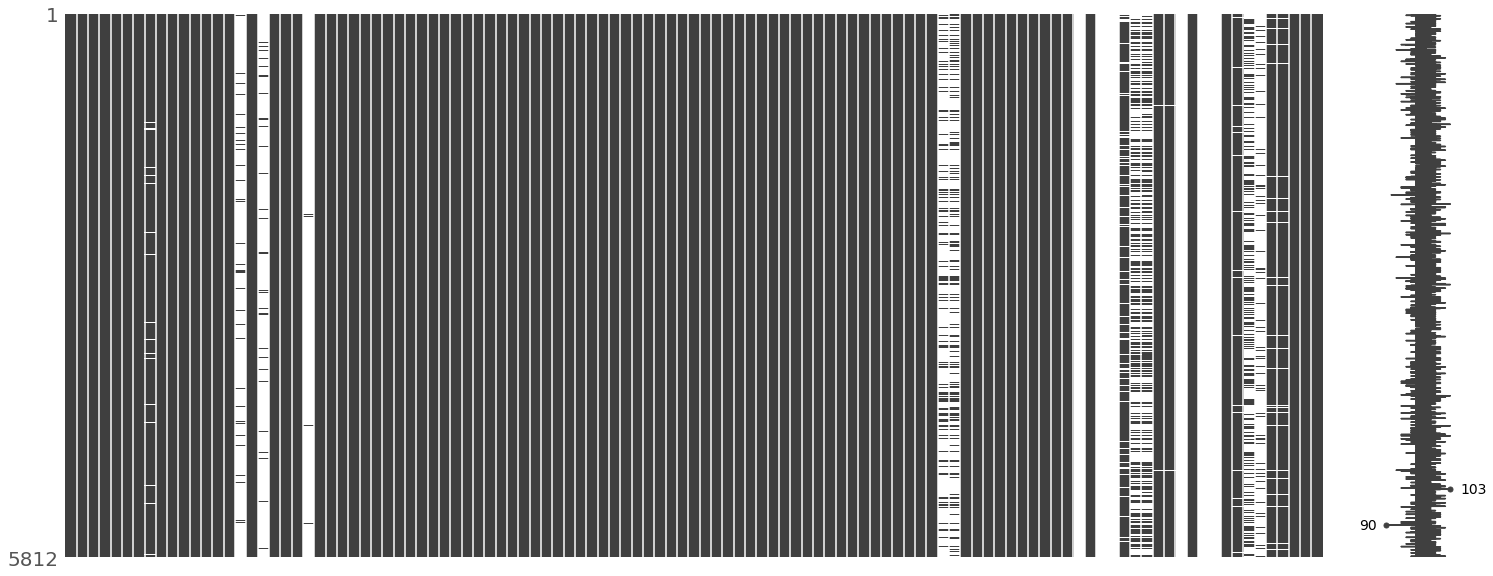

In [10]:
msngo.matrix(df_train2, [np.nan]);

In [11]:
conteo = pd.DataFrame(df_train2.isna().sum())
conteo.columns=['ceros']
conteo.sort_values(by=['ceros'],ascending=False)[:25]

,ceros
aptnum,5812
othfeatr,5812
rescode,5812
premtype,5812
zip,5812
state,5812
officrid,5727
arstoffn,5464
sumoffen,5456
post,5268


Una pequeña muestra de como es que se comportan los datos perdidos

Se procede a utilizar la funcion create_suitable_dataframe que normaliza la cantidad de atributos

In [19]:
create_suitable_dataframe(df_train)

['year', 'pct', 'ser_num', 'datestop', 'timestop', 'perstop', 'compyear', 'comppct', 'repcmd', 'revcmd', 'dob', 'age', 'ht_feet', 'ht_inch', 'weight', 'addrpct', 'linecm', 'detailcm', 'month', 'perobs', 'meters', 'age_individual']


(     recstat inout trhsloc typeofid explnstp othpers arstmade sumissue  \
 0          A     O       P        P        Y       N        N        N   
 2          1     O       P        V        Y       N        N        N   
 3          A     O       P        P        Y       N        N        N   
 5          1     I       T        V        Y       N        N        N   
 6          1     O       P        P        Y       N        N        N   
 8          A     O       P        P        Y       Y        N        N   
 9          A     O       P        P        Y       N        N        N   
 10         A     O       P        V        Y       N        N        N   
 11         1     I       T        O        Y       N        N        N   
 12         1     I       T        V        Y       Y        Y        N   
 14         A     O       P        P        Y       Y        N        N   
 16         A     O       P        V        Y       N        N        N   
 17         1     I      

In [20]:
df_train.shape

(5812, 114)

In [21]:
df_train.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,meters,month,age_individual
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,7,,1013067,0238633,CM,1,20,1.79832,4,24.0
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,U,,1012043,0212157,CM,1,14,1.67640,10,NaN
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,U,,1017599,0240200,CM,1,20,1.92024,10,21.0
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,4,35,1002625,0183442,CM,1,24,1.67640,12,22.0
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,U,,1024535,0209890,CM,1,20,1.70688,12,NaN


In [22]:
for i in df_train:
    print("\n", i)
    print(df_train[i].value_counts("%")*100)


 year
2009    100.0
Name: year, dtype: float64

 pct
75     5.454233
73     4.783207
120    3.699243
79     3.303510
23     2.494838
40     2.460427
32     2.374398
103    2.150723
110    2.099105
44     2.030282
114    1.927047
113    1.927047
67     1.909842
115    1.858224
109    1.789401
43     1.754990
14     1.737784
90     1.720578
52     1.703372
70     1.686167
77     1.651755
42     1.582932
101    1.548520
83     1.531315
34     1.479697
60     1.479697
106    1.479697
81     1.445286
46     1.445286
25     1.428080
         ...   
9      0.946318
69     0.911906
61     0.911906
122    0.808672
72     0.808672
45     0.757054
26     0.722643
84     0.705437
66     0.688231
19     0.688231
7      0.653820
100    0.619408
13     0.602202
48     0.567791
112    0.567791
63     0.567791
24     0.550585
10     0.550585
94     0.481762
6      0.464556
68     0.464556
5      0.464556
123    0.395733
78     0.395733
1      0.378527
20     0.378527
18     0.361321
17     0.275292
50

Name: ac_assoc, dtype: float64

 cs_furtv
Y    51.032347
N    48.967653
Name: cs_furtv, dtype: float64

 rf_rfcmp
N    90.467997
Y     9.532003
Name: rf_rfcmp, dtype: float64

 ac_cgdir
N    75.309704
Y    24.690296
Name: ac_cgdir, dtype: float64

 rf_verbl
N    99.449415
Y     0.550585
Name: rf_verbl, dtype: float64

 cs_vcrim
N    90.898142
Y     9.101858
Name: cs_vcrim, dtype: float64

 cs_bulge
N    90.261528
Y     9.738472
Name: cs_bulge, dtype: float64

 cs_other
N    81.72746
Y    18.27254
Name: cs_other, dtype: float64

 ac_incid
Y    56.916724
N    43.083276
Name: ac_incid, dtype: float64

 ac_time
N    59.979353
Y    40.020647
Name: ac_time, dtype: float64

 rf_knowl
N    98.640743
Y     1.359257
Name: rf_knowl, dtype: float64

 ac_stsnd
N    97.195458
Y     2.804542
Name: ac_stsnd, dtype: float64

 ac_other
N    96.57605
Y     3.42395
Name: ac_other, dtype: float64

 sb_hdobj
N    95.509291
Y     4.490709
Name: sb_hdobj, dtype: float64

 sb_outln
N    99.397798
Y     0.60220

           2.890571
0232339    0.412939
0215157    0.258087
0245710    0.223675
0213048    0.206469
0212883    0.189264
0213320    0.172058
0214721    0.154852
0195270    0.154852
0230378    0.154852
0182507    0.154852
0156219    0.137646
0180716    0.137646
0233575    0.137646
0234664    0.137646
0182417    0.137646
0182951    0.120440
0236608    0.120440
0205857    0.120440
0190849    0.120440
0174110    0.120440
0174886    0.120440
0193600    0.103235
0212540    0.103235
0240880    0.103235
0239499    0.103235
0187436    0.103235
0199612    0.103235
0191476    0.103235
0211884    0.086029
             ...   
0190380    0.017206
0235673    0.017206
0211237    0.017206
0260004    0.017206
0167969    0.017206
0190220    0.017206
0177139    0.017206
0226746    0.017206
0183374    0.017206
0251286    0.017206
0194869    0.017206
0239206    0.017206
0249388    0.017206
0242786    0.017206
0153263    0.017206
0197060    0.017206
0194808    0.017206
0182385    0.017206
0198031    0.017206


In [23]:
df_train_f = df_train.replace(' ', np.nan)

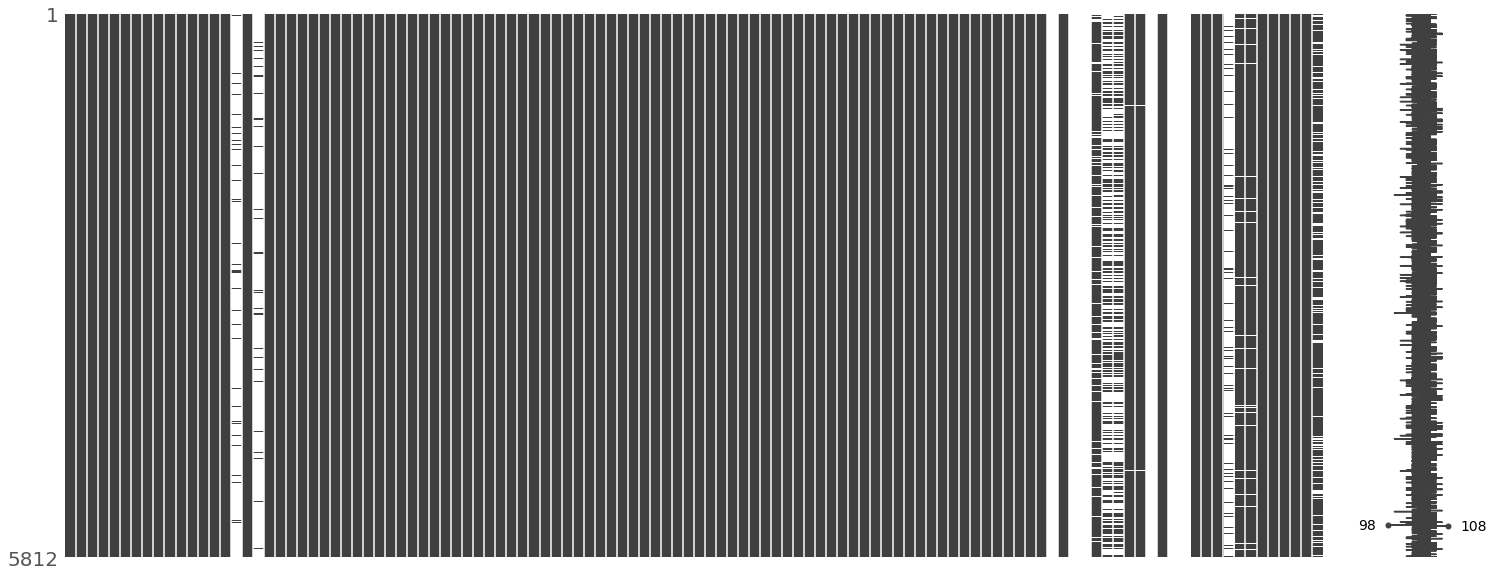

In [24]:
msngo.matrix(df_train_f, [np.nan]);

In [25]:
conteo = pd.DataFrame(df_train_f.isna().sum())
conteo.columns=['ceros']
conteo.sort_values(by=['ceros'],ascending=False)[:25]

,ceros
aptnum,5812
zip,5812
othfeatr,5812
rescode,5812
premtype,5812
state,5812
arstoffn,5464
sumoffen,5456
post,5268
addrnum,3300


Se eliminaran aquellas columnas, que posean mas de la mitad de los datos perdidos

In [36]:
df_train_f = df_train_f.drop(columns=conteo[conteo['ceros']>int(df_train_f.shape[0]/2)].index)

In [37]:
conteo = pd.DataFrame(df_train_f.isna().sum())
conteo.columns=['ceros']
conteo.sort_values(by=['ceros'],ascending=False)[:25]

,ceros
age_individual,1176
premname,591
ycoord,168
xcoord,168
crossst,40
stinter,40
rf_verbl,0
ac_cgdir,0
rf_furt,0
revcmd,0


In [38]:
df_train_f.shape

(5812, 103)

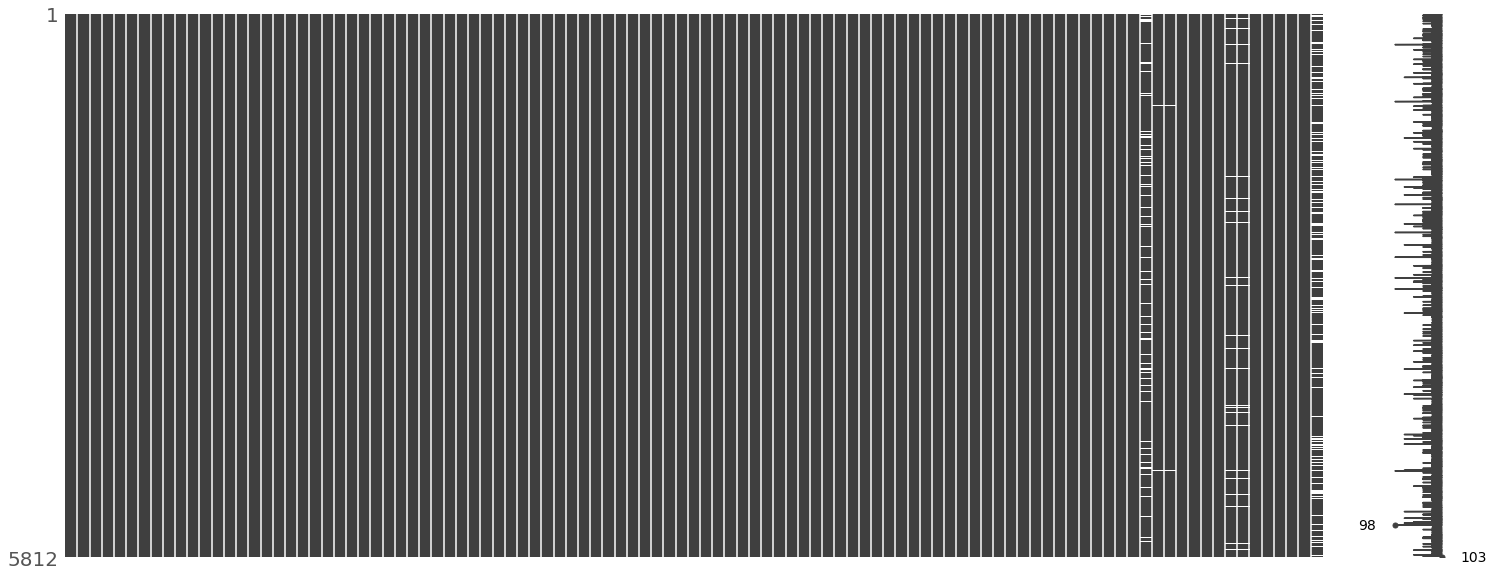

In [39]:
msngo.matrix(df_train_f, [np.nan]);

Se analiza el vector objetivo posterior a la eliminacion de los atributos y tambien se recodificara este vector

In [40]:
df_train_f['arstmade'].value_counts('%')

N    0.940124
Y    0.059876
Name: arstmade, dtype: float64

In [42]:
df_train_f['arstmade'] = np.where(df_train_f['arstmade'] == 'Y', 0, 1)
df_train_f['arstmade'].value_counts('%')

1    0.940124
0    0.059876
Name: arstmade, dtype: float64

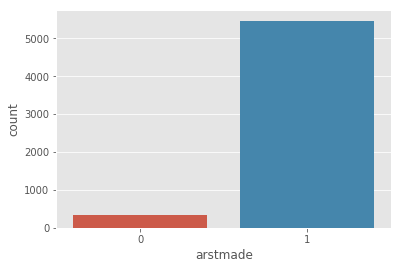

In [43]:
sns.countplot(df_train_f['arstmade'])

Cabe destacar el fuerte desvalanceo de clases que se observa en el vector objetivo

Se eliminaran los datos perdidos, para poder realizar predicciones sobre el vector objetivo

In [44]:
df_train_f.dropna(inplace=True)
df_train_f.shape

(4010, 103)

In [45]:
df_train_f['arstmade'].value_counts('%')

1    0.938653
0    0.061347
Name: arstmade, dtype: float64

In [82]:
muy_largas = []
for x,i in df_train_f.iteritems():
    if(np.dtype(i)=='object'):   
        print(x)
        print(i.value_counts('%'))
        print('\n')
        if len(i.value_counts('%').index)>10:
            muy_largas.append(x)

recstat
A    0.638155
1    0.361845
Name: recstat, dtype: float64


inout
O    0.748628
I    0.251372
Name: inout, dtype: float64


trhsloc
P    0.710723
H    0.173815
T    0.078304
U    0.037157
Name: trhsloc, dtype: float64


crimsusp
FEL                               0.134414
CPW                               0.126434
MISD                              0.111222
FELONY                            0.092020
ROBBERY                           0.071322
GLA                               0.058853
BURGLARY                          0.045137
CRIM TRES                         0.029177
CRIMINAL TRESPASS                 0.022195
ASSAULT                           0.017207
GRAND LARCENY                     0.017207
CPCS                              0.016708
MIS                               0.015960
BURG                              0.014464
CPM                               0.013466
PETIT LARCENY                     0.012718
CSCS                              0.011721
CRIM TRESS                      

city
BROOKLYN         0.348130
QUEENS           0.231172
MANHATTAN        0.222195
BRONX            0.149127
STATEN ISLAND    0.049377
Name: city, dtype: float64


sector
A    0.105985
G    0.105736
H    0.093766
E    0.092768
B    0.091521
F    0.088778
C    0.087781
I    0.077556
D    0.069077
J    0.064339
K    0.034663
M    0.028678
P    0.019701
N    0.012469
T    0.010224
Q    0.007980
U    0.006484
R    0.002494
Name: sector, dtype: float64


beat
U     0.646384
9     0.043890
1     0.029426
7     0.027182
10    0.026185
2     0.024938
8     0.023940
11    0.020698
5     0.020449
4     0.018204
6     0.016958
3     0.016958
15    0.012219
13    0.010973
16    0.009726
12    0.008978
14    0.008479
17    0.008479
18    0.005486
24    0.004239
19    0.003990
22    0.002743
62    0.001995
20    0.001496
21    0.001247
23    0.001247
61    0.000998
41    0.000748
42    0.000748
25    0.000748
32    0.000249
Name: beat, dtype: float64


xcoord
1001575    0.004988
0987078    0.002993


Despues del analizis realizado se observa que existen features del tipo Object que tienen gran cantidad de posibilidades, y binarizarlas podria generar una gran sobrecarga en el modelo posterior, por lo que algunas de estas seran dropeadas

In [83]:
muy_largas

['crimsusp',
 'haircolr',
 'premname',
 'stinter',
 'crossst',
 'sector',
 'beat',
 'xcoord',
 'ycoord']

In [84]:
df_train_f = df_train_f.drop(columns=muy_largas)

In [85]:
df_train_f.shape

(4010, 94)

Se utilizara la funcion 'get_dummies' para poder generar la binarizacion de estas columnas

In [86]:
for colname, serie in df_train_f.iteritems():
    if serie.dtype == 'object':
        df_train_f=pd.concat([df_train_f, pd.get_dummies(serie, drop_first=True,prefix=colname)], axis=1) 
        df_train_f = df_train_f.drop(columns = colname)

In [87]:
df_train_f.shape

(4010, 112)

In [88]:
for colname, serie in df_train_f.iteritems():
    print(colname)
    print(serie.value_counts('%'))
    print('\n')

year
2009    1.0
Name: year, dtype: float64


pct
75     0.057357
73     0.043142
120    0.040399
79     0.038404
23     0.027681
40     0.025935
110    0.024439
115    0.023441
103    0.022195
32     0.021446
113    0.020948
109    0.020200
67     0.018953
77     0.018703
43     0.018454
90     0.017706
44     0.017706
42     0.017706
34     0.017456
52     0.017456
83     0.017207
28     0.017207
25     0.016209
106    0.015960
14     0.015960
101    0.015960
114    0.015212
60     0.014963
70     0.014963
41     0.014464
         ...   
122    0.007980
26     0.007731
19     0.007731
7      0.007481
71     0.007232
10     0.007232
111    0.007232
62     0.007232
84     0.006983
72     0.006983
48     0.006733
45     0.006484
6      0.006234
24     0.005985
112    0.005985
68     0.005237
94     0.005237
13     0.005237
63     0.005237
1      0.004988
5      0.004988
20     0.004489
78     0.004239
18     0.003491
46     0.002743
50     0.001995
100    0.001746
17     0.001746
123   

0    0.774065
1    0.225935
Name: radio_Y, dtype: float64


ac_rept_Y
0    0.880798
1    0.119202
Name: ac_rept_Y, dtype: float64


ac_inves_Y
0    0.877556
1    0.122444
Name: ac_inves_Y, dtype: float64


rf_vcrim_Y
0    0.894264
1    0.105736
Name: rf_vcrim_Y, dtype: float64


rf_othsw_Y
0    0.960599
1    0.039401
Name: rf_othsw_Y, dtype: float64


ac_proxm_Y
0    0.810224
1    0.189776
Name: ac_proxm_Y, dtype: float64


rf_attir_Y
0    0.912718
1    0.087282
Name: rf_attir_Y, dtype: float64


cs_objcs_Y
0    0.973317
1    0.026683
Name: cs_objcs_Y, dtype: float64


cs_descr_Y
0    0.865586
1    0.134414
Name: cs_descr_Y, dtype: float64


cs_casng_Y
0    0.700998
1    0.299002
Name: cs_casng_Y, dtype: float64


cs_lkout_Y
0    0.830673
1    0.169327
Name: cs_lkout_Y, dtype: float64


rf_vcact_Y
0    0.931421
1    0.068579
Name: rf_vcact_Y, dtype: float64


cs_cloth_Y
0    0.954613
1    0.045387
Name: cs_cloth_Y, dtype: float64


cs_drgtr_Y
0    0.904489
1    0.095511
Name: cs_drgtr_